# Val, Test 결과 EDA

In [131]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import os

result_dir = '/opt/ml/datacentric/output/05-30-04:10:39'
result_df = pd.read_csv(os.path.join(result_dir, 'val_result.csv'))
submission_df = pd.read_csv(os.path.join(result_dir, 'submission.csv'))

In [132]:
category_dict = {
    0: 'IT/Science',
    1: 'Economy',
    2: 'Society',
    3: 'Life/Culture',
    4: 'Global',
    5: 'Sports',
    6: 'Politics'
}
# ID,text,target,url,date, pred
result_df['correct'] = (result_df['target']==result_df['preds']).astype('uint16')


In [154]:
### 오답 csv 출력 ###
output = result_df[result_df['correct']==0][['ID','text','target','preds']]
output['target'] = output['target'].map(category_dict)
output['preds'] = output['preds'].map(category_dict)
output.to_csv('./wrong_answer.csv', index=False)

# 1. val - accuracy

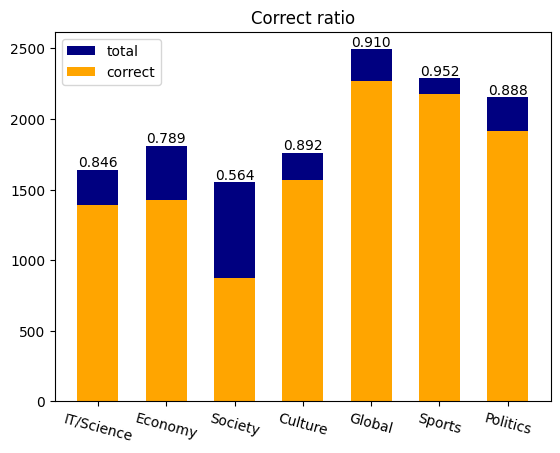

In [152]:
total, correct=[],[]
num_labels = result_df['target'].nunique()
for i in range(num_labels):
    tmp = result_df[result_df['target']==i]
    total.append(tmp['correct'].count())
    correct.append(tmp['correct'].sum())
plt.bar(range(num_labels), total, color='navy', label='total', width=0.6)
plt.bar(range(num_labels), correct, color='orange',label='correct', width=0.6)
for i in range(num_labels):
    plt.text(i,total[i],f"{correct[i]/total[i]:.3f}", ha='center', va='bottom')
plt.xticks(list(category_dict.keys()), list(category_dict.values()), rotation=-15)
plt.title('Correct ratio')
plt.legend()
plt.show()

# 2. Val - Heatmap

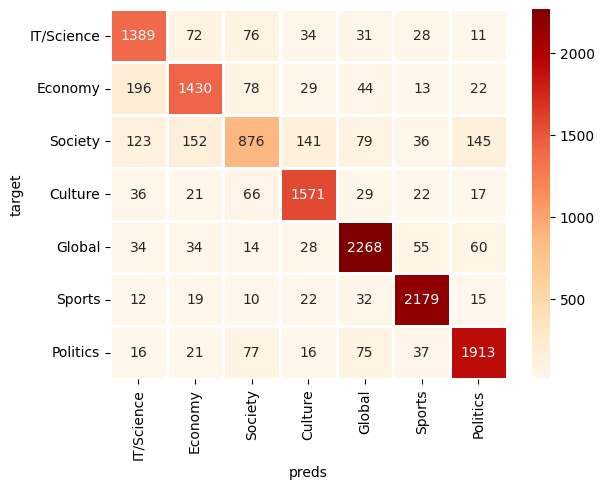

In [151]:
cross_df = pd.crosstab(result_df['target'].map(category_dict), result_df['preds'].map(category_dict)).reindex(category_dict.values())
cross_df = cross_df.reindex(columns=category_dict.values())
sns.heatmap(cross_df, annot=True,fmt='g', cmap='OrRd', linewidths=0.8)
plt.show()

# 3. Normalized Heatmap

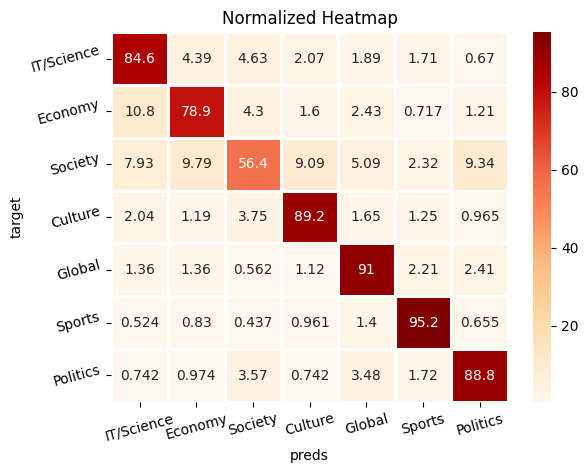

In [150]:
# normalized_df = cross_df.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=1)
normalized_df = cross_df.apply(lambda x: 100*x / x.sum(), axis=1)

sns.heatmap(normalized_df, annot=True,fmt='.3g', cmap='OrRd', linewidths=0.8)
plt.title('Normalized Heatmap')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

# 4. test - pred

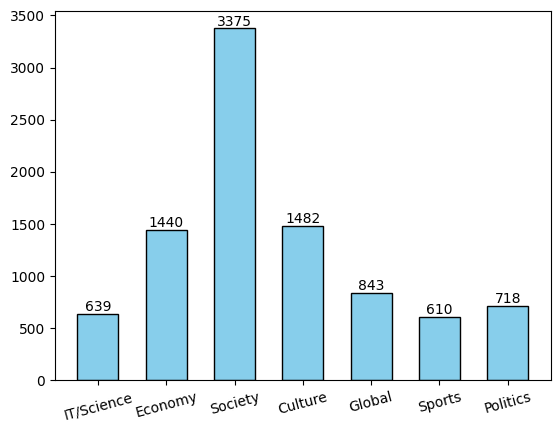

In [137]:
pred_count = submission_df['target'].value_counts().sort_index()
plt.bar(pred_count.index, pred_count, width=0.6, color='skyblue', edgecolor='black')
for i, v in category_dict.items():
    plt.text(i, pred_count[i], str(pred_count[i]), ha='center', va='bottom')
plt.xticks(list(category_dict.keys()), list(category_dict.values()), rotation=15)
plt.show()